In [19]:
import pandas as pd
import pickle
import warnings
warnings.filterwarnings("ignore")

In [20]:
data=pd.read_csv(r"C:\Users\muche\Downloads\fiat500.csv")

In [21]:
data.head(5)

,ID,model,engine_power,age_in_days,km,previous_owners,lat,lon,price
0,1,lounge,51,882,25000,1,44.907242,8.611560,8900
1,2,pop,51,1186,32500,1,45.666359,12.241890,8800
2,3,sport,74,4658,142228,1,45.503300,11.417840,4200
3,4,lounge,51,2739,160000,1,40.633171,17.634609,6000
4,5,pop,73,3074,106880,1,41.903221,12.495650,5700


In [22]:
data.describe()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,769.500000,51.904421,1650.980494,53396.011704,1.123537,43.541361,11.563428,8576.003901
std,444.126671,3.988023,1289.522278,40046.830723,0.416423,2.133518,2.328190,1939.958641
min,1.000000,51.000000,366.000000,1232.000000,1.000000,36.855839,7.245400,2500.000000
25%,385.250000,51.000000,670.000000,20006.250000,1.000000,41.802990,9.505090,7122.500000
50%,769.500000,51.000000,1035.000000,39031.000000,1.000000,44.394096,11.869260,9000.000000
75%,1153.750000,51.000000,2616.000000,79667.750000,1.000000,45.467960,12.769040,10000.000000
max,1538.000000,77.000000,4658.000000,235000.000000,4.000000,46.795612,18.365520,11100.000000


In [23]:
data["model"].unique()

array(['lounge', 'pop', 'sport'], dtype=object)

In [24]:
data["engine_power"].unique()

array([51, 74, 73, 62, 63, 66, 77, 58], dtype=int64)

In [25]:
data.groupby("model").count()

,ID,engine_power,age_in_days,km,previous_owners,lat,lon,price
model,,,,,,,,
lounge,1094,1094,1094,1094,1094,1094,1094,1094
pop,358,358,358,358,358,358,358,358
sport,86,86,86,86,86,86,86,86


In [26]:
data2=data.drop(["lat","lon"],axis=1)

In [27]:
data2.tail(5)

,ID,model,engine_power,age_in_days,km,previous_owners,price
1533,1534,sport,51,3712,115280,1,5200
1534,1535,lounge,74,3835,112000,1,4600
1535,1536,pop,51,2223,60457,1,7500
1536,1537,lounge,51,2557,80750,1,5990
1537,1538,pop,51,1766,54276,1,7900


In [28]:
data2=data2.drop("ID",axis=1)

In [29]:
data2.tail(5)

,model,engine_power,age_in_days,km,previous_owners,price
1533,sport,51,3712,115280,1,5200
1534,lounge,74,3835,112000,1,4600
1535,pop,51,2223,60457,1,7500
1536,lounge,51,2557,80750,1,5990
1537,pop,51,1766,54276,1,7900


In [32]:
Y=data3["price"]

In [33]:
Y.head(3)

0    8900
1    8800
2    4200
Name: price, dtype: int64

In [34]:
X=data3.drop("price",axis=1)

In [35]:
X.head(3)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
0,51,882,25000,1,1,0,0
1,51,1186,32500,1,0,1,0
2,74,4658,142228,1,0,0,1


In [30]:
data3=pd.get_dummies(data2,dtype=int)

In [31]:
data3.head(5)

,engine_power,age_in_days,km,previous_owners,price,model_lounge,model_pop,model_sport
0,51,882,25000,1,8900,1,0,0
1,51,1186,32500,1,8800,0,1,0
2,74,4658,142228,1,4200,0,0,1
3,51,2739,160000,1,6000,1,0,0
4,73,3074,106880,1,5700,0,1,0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.33,random_state=49)

In [37]:
X_train.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
354,51,366,18000,1,1,0,0
98,51,456,18592,2,1,0,0
108,51,366,12929,1,0,1,0
14,51,1035,40500,1,1,0,0
450,51,701,22794,3,1,0,0


In [38]:
Y_test.tail(5)

540      8900
1306     9700
360      6990
216      8500
207     10850
Name: price, dtype: int64

In [39]:
Y_train.head(5)

354    10500
98     10900
108     9400
14      9300
450     9600
Name: price, dtype: int64

In [40]:
X_test.head(5)

,engine_power,age_in_days,km,previous_owners,model_lounge,model_pop,model_sport
776,51,762,17000,1,1,0,0
487,51,425,20636,1,1,0,0
1462,62,3470,90000,1,0,1,0
89,51,397,17912,1,1,0,0
852,51,1035,33000,1,1,0,0


In [41]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [42]:
ypred=reg.predict(X_test)

In [43]:
ypred

array([10077.0486545 , 10296.89113709,  6231.54053645, 10371.87050424,
        9543.8908106 , 10311.36861938,  8883.57598947,  7157.79300792,
        9944.27338867, 10426.6142839 ,  9912.02921839,  7492.70862718,
        9882.00387912,  6645.64608231, 10333.80213676,  8020.94888715,
       10228.57854658, 10530.25049259,  9188.10296552,  8658.91690616,
        7685.86894274,  9410.15189019,  8825.54005856,  9911.92508766,
       10103.04304765,  6699.79552359,  6254.1941181 ,  6353.64026044,
        4685.57678728, 10147.55738739,  9412.7006505 ,  4999.96883869,
        9396.11094252,  9701.00047514,  8245.07179202,  7014.74657124,
        9855.0499626 ,  8022.65546956,  6202.74656775, 10387.44465039,
        7477.65149429,  6555.14982661, 10368.68963757,  5057.57213783,
        9652.3799067 ,  9312.51608202,  8642.27980214,  9966.91032444,
        5663.75605319,  7526.68879785,  4958.61357652,  9346.67438618,
       10022.93146835, 10140.06080681,  6436.7985707 ,  5851.7441137 ,
      

In [44]:
from sklearn.metrics import r2_score
r2_score(Y_test,ypred)#regression score function that tells the accuracy of the model that is prediction performance(max=1,min can be negative also)

0.8432871743994131

In [45]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,ypred) #average of square of difference between observed and predicted data

577671.0281058007

In [46]:
results = pd.DataFrame(columns=['price','Predicted'])
results['price']=Y_test
results['Predicted']=ypred
results=results.reset_index()
results['Id']=results.index
results.head(5)

,index,price,Predicted,Id
0,776,9850,10077.048654,0
1,487,10650,10296.891137,1
2,1462,5199,6231.540536,2
3,89,9970,10371.870504,3
4,852,9999,9543.890811,4


[]

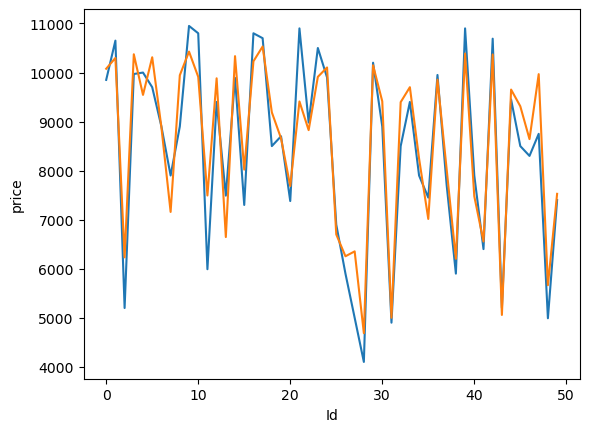

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="Id",y="price",data=results.head(50))
sns.lineplot(x="Id",y="Predicted",data=results.head(50))
plt.plot()

In [48]:
data.groupby("previous_owners").count()

,ID,model,engine_power,age_in_days,km,lat,lon,price
previous_owners,,,,,,,,
1,1389,1389,1389,1389,1389,1389,1389,1389
2,117,117,117,117,117,117,117,117
3,23,23,23,23,23,23,23,23
4,9,9,9,9,9,9,9,9


<Axes: >

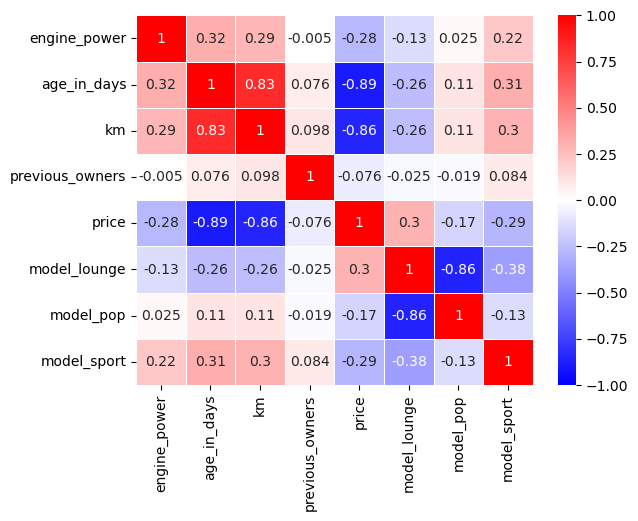

In [49]:
sns.heatmap(data3.corr(),vmax=1,vmin=-1,annot=True,linewidth=.5,cmap='bwr')

In [63]:
a=[[51,662,18000,1,1,0,0],[52,360,1900,1,0,1,0]]

In [64]:
reg.predict(a)

array([10143.76310811, 10438.38016681])